In [11]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

def mod(initializer=None, dropout_rate=0.0, regularizer=None):
    model=Sequential([
        Flatten(input_shape=(32,32,3)),
        Dense(512,activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizer),
        Dropout(dropout_rate),
        Dense(256,activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizer),
        Dropout(dropout_rate),
        Dense(128,activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizer),
        Dropout(dropout_rate),
        Dense(10,activation='softmax')
    ])
    return model

In [ ]:
baseline_model = mod()
baseline_model.compile(optimizer=Adam(learning_rate=0.005),loss='categorical_crossentropy',metrics=['accuracy'])
baseline_history = baseline_model.fit(x_train, y_train, epochs=25, batch_size=64,validation_split=0.2)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.2284 - loss: 2.7283 - val_accuracy: 0.3306 - val_loss: 1.8403
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3525 - loss: 1.8047 - val_accuracy: 0.3591 - val_loss: 1.7824
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.3790 - loss: 1.7289 - val_accuracy: 0.3836 - val_loss: 1.7315
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.3930 - loss: 1.6863 - val_accuracy: 0.3807 - val_loss: 1.7265
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4049 - loss: 1.6560 - val_accuracy: 0.3944 - val_loss: 1.6878
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.4093 - loss: 1.6385 - val_accuracy: 0.4152 - val_loss: 1.6446
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4204 - loss: 1.6152 - val_accuracy: 0.4104 - val_loss: 1.6559
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4243 - loss: 1.6025 - val_a

In [3]:
test_loss, test_accuracy = baseline_model.evaluate(x_test, y_test, verbose=2)
print(f'Baseline model test Accuracy: {test_accuracy:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.5024 - loss: 1.4015
Baseline model test Accuracy: 0.5024


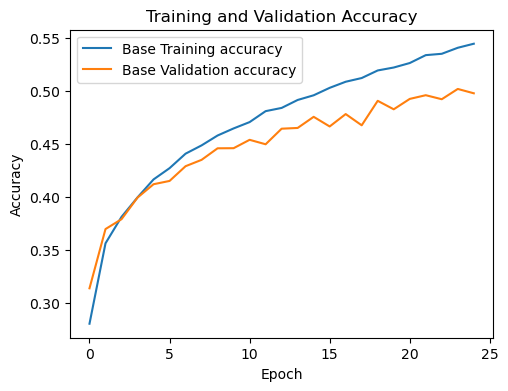

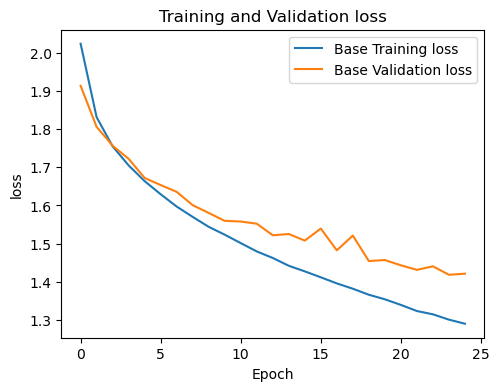

In [4]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(baseline_history.history['accuracy'],label='Base Training accuracy')
plt.plot(baseline_history.history['val_accuracy'],label='Base Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(baseline_history.history['loss'],label='Base Training loss')
plt.plot(baseline_history.history['val_loss'],label='Base Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

In [5]:
from tensorflow.keras.initializers import GlorotUniform
xavier_model = mod(initializer=GlorotUniform())
xavier_model.compile(optimizer=Adam(learning_rate=0.005), loss='categorical_crossentropy',metrics=['accuracy'])
xavier_history = xavier_model.fit(x_train,y_train,epochs=25,batch_size=64,validation_split=0.2)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2319 - loss: 2.1281 - val_accuracy: 0.3221 - val_loss: 1.9151
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3416 - loss: 1.8638 - val_accuracy: 0.3588 - val_loss: 1.8220
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3710 - loss: 1.7848 - val_accuracy: 0.3814 - val_loss: 1.7651
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3954 - loss: 1.7018 - val_accuracy: 0.3895 - val_loss: 1.7164
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4137 - loss: 1.6690 - val_accuracy: 0.4038 - val_loss: 1.6821
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4206 - loss: 1.6359 - val_accuracy: 0.4233 - val_loss: 1.6447
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4401 - loss: 1.6067 - val_accuracy: 0.4219 - val_loss: 1.6384
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4402 - loss: 1.5785 - val_accuracy: 0.

In [6]:
test_loss, test_accuracy = xavier_model.evaluate(x_test, y_test, verbose=2)
print(f'Xavier model test Accuracy: {test_accuracy:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.4967 - loss: 1.4306
Xavier model test Accuracy: 0.4967


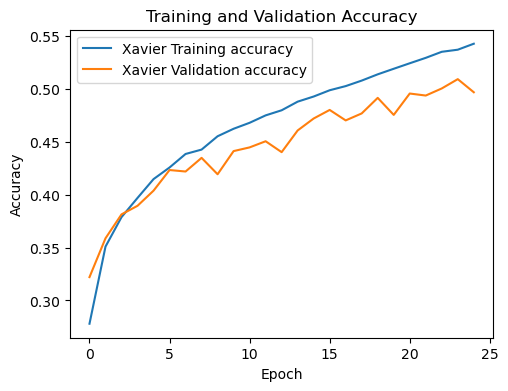

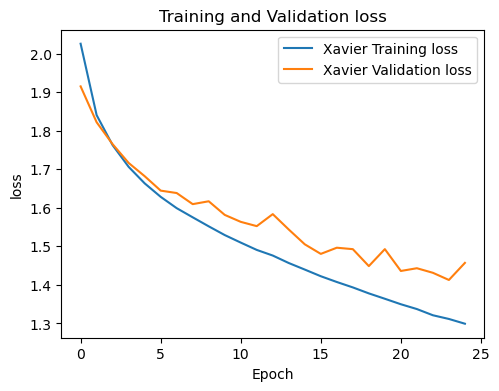

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(xavier_history.history['accuracy'],label='Xavier Training accuracy')
plt.plot(xavier_history.history['val_accuracy'],label='Xavier Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(xavier_history.history['loss'],label='Xavier Training loss')
plt.plot(xavier_history.history['val_loss'],label='Xavier Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

In [8]:
from tensorflow.keras.initializers import HeNormal
kaiming_model = mod(initializer=HeNormal())
kaiming_model.compile(optimizer=Adam(learning_rate=0.005), loss='categorical_crossentropy',metrics=['accuracy'])
kaiming_history = xavier_model.fit(x_train,y_train,epochs=25,batch_size=64,validation_split=0.2)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5518 - loss: 1.2769 - val_accuracy: 0.4848 - val_loss: 1.4657
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5563 - loss: 1.2664 - val_accuracy: 0.4988 - val_loss: 1.4338
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5565 - loss: 1.2507 - val_accuracy: 0.4926 - val_loss: 1.4282
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5592 - loss: 1.2536 - val_accuracy: 0.5102 - val_loss: 1.4003
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5677 - loss: 1.2331 - val_accuracy: 0.4966 - val_loss: 1.4231
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5679 - loss: 1.2257 - val_accuracy: 0.5106 - val_loss: 1.3982
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5745 - loss: 1.2112 - val_accuracy: 0.5122 - val_loss: 1.3940
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5773 - loss: 1.2023 - val_accuracy: 0.

In [9]:
test_loss, test_accuracy = kaiming_model.evaluate(x_test, y_test, verbose=2)
print(f'Kaiming model test Accuracy: {test_accuracy:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.0942 - loss: 2.4680
Kaiming model test Accuracy: 0.0942


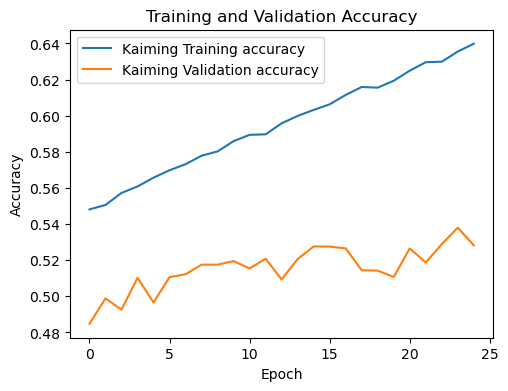

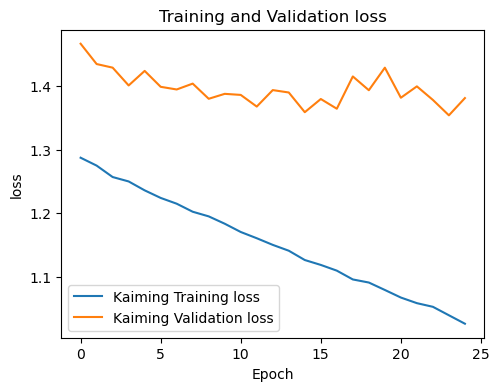

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(kaiming_history.history['accuracy'],label='Kaiming Training accuracy')
plt.plot(kaiming_history.history['val_accuracy'],label='Kaiming Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(kaiming_history.history['loss'],label='Kaiming Training loss')
plt.plot(kaiming_history.history['val_loss'],label='Kaiming Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

plt.show()